<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 36: Classification

Associated Textbook Sections: [17.0 - 17.2](https://ccsf-math-108.github.io/textbook/chapters/17/Classification.html)

---

## Outline

* [Prediction](#Prediction)
* [Classification Examples](#Classification-Examples)
* [Classification through Feature Relationships](#Classification-through-Feature-Relationships)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from mpl_toolkits.mplot3d import Axes3D

---

## Prediction

---

### Guessing the Value of an Attribute

* Based on incomplete information
* One way of making predictions:
    * To predict an outcome for an individual,
    * find others who are like that individual
    * and whose outcomes you know.
    * Use those outcomes as the basis of your prediction.
* Two Types of Prediction
    * Classification = Categorical
    * Regression = Numeric


---

### Prediction Example: Visual Plant Identification

<a href="https://unsplash.com/photos/purple-flower-in-tilt-shift-lens-OBtrCoiKlZo" title="purple flower in tilt shift lens"><img src="./iris.avif" alt="an iris plant" width=40%></a>

* What type of plant is this?
* How do we train a computer to make this decision?

---

### Machine Learning Algorithm

* A mathematical model
* calculated based on sample data ("training data")
* that makes predictions or decisions
* without being explicitly programmed to perform the task

---

## Classification Examples

---

### Classification Example: Playlist Sorting

* 2 Fall 2021 MATH 108 students (Lil Cabrera and Olga Aronov) analyzed music by exploring song attributes from [Spotify's API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)
* Spotify's API response to requesting a track's audio features:

```json
{
  "audio_features": [
    {
      "acousticness": 0.00242,
      "analysis_url": "https://api.spotify.com/v1/audio-analysis/2takcwOaAZWiXQijPHIx7B\n",
      "danceability": 0.585,
      "duration_ms": 237040,
      "energy": 0.842,
      "id": "2takcwOaAZWiXQijPHIx7B",
      "instrumentalness": 0.00686,
      "key": 9,
      "liveness": 0.0866,
      "loudness": -5.883,
      "mode": 0,
      "speechiness": 0.0556,
      "tempo": 118.211,
      "time_signature": 4,
      "track_href": "https://api.spotify.com/v1/tracks/2takcwOaAZWiXQijPHIx7B\n",
      "type": "audio_features",
      "uri": "spotify:track:2takcwOaAZWiXQijPHIx7B",
      "valence": 0.428
    }
  ]
}
```
* They classified songs by assigning a song to one of two playlists (Workout or Relax) based on which playlist shared similar attributes such as energy, danceability, etc.

---

### Classification Example: Targeted Advertising

<div style="padding-left:30px"><a href="(https://www.nytimes.com/2012/02/19/magazine/shopping-habits.html"><img src="./target_nyt.webp" width= 50% alt="Customers shopping at Target"></a></div>

> Andrew Pole had just started working as a statistician for Target in 2002, when two colleagues from the marketing department stopped by his desk to ask an odd question: "If we wanted to figure out if a customer is pregnant, even if she didn't want us to know, can you do that?" - [How Companies Learn Your Secrets (The New York Times Magazine)](https://www.nytimes.com/2012/02/19/magazine/shopping-habits.html)

---

### Classification Example: Sentiment Analysis

<div style="padding-left: 30px"><a href="https://unsplash.com/photos/decorative-egg-and-egg-shells-xcSGMHsaLio" title="egg and egg shells"><img width = 50% src="./happy_sad_eggs.jpeg" alt="egg and egg shells with faces drawn on them"></a></div>

* Sentiment analysis is a type of classification that focuses on extracting subjective information. For example, a statement can be classified as positive, neutral, or negative.

* The following is an example of using a sentiment analysis tool `SentimentIntensityAnalyzer` from the `nltk` ([Natural Language Toolkit](https://www.nltk.org/index.html)) library.

_You don't need to know about the `nltk` library, but you might want to one day!_

In [ ]:
!pip install -q nltk #Install nltk

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon', quiet=True)

sia = SentimentIntensityAnalyzer()

text_list = ["I love CCSF!",
             "I hate CCSF!",
             "I attend classes at CCSF."] # Strings to classify

for text in text_list:
    sentiment = sia.polarity_scores(text)
    print(f"'{text}' -> Sentiment: {sentiment}")

'I love CCSF!' -> Sentiment: {'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}
'I hate CCSF!' -> Sentiment: {'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound': -0.6114}
'I attend classes at CCSF.' -> Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


---

## Classification through Feature Relationships

* How can data be used to perform classification?
* The relationship between various attributes (features) might reveal patterns!
* The choice of attributes and the number of attributes can have a big impact on identifying classes.

---

### Classiying Chronic Kidney Disease

According to the [National Kidney Foundation](https://www.kidney.org/kidney-topics/chronic-kidney-disease-ckd):

> Your kidneys do many important jobs. Some of the ways they keep your whole body in balance include:
>
> * Removing natural waste products and extra water from your body
> * Helping make red blood cells
> * Balancing important minerals in your body
> * Helping maintain your blood pressure
> * Keeping your bones healthy
>
> Chronic kidney disease (CKD) is when the kidneys have become damaged over time (for at least 3 months) and have a hard time doing all their important jobs. CKD also increases the risk of other health problems like heart disease and stroke.

Your bodily measurements, such as white blood cell count, glucose levels, hemoglobin levels, etc., can help predict whether or not you are experiencing CKD.

---

### Demo: Classifying Chronic Kidney Disease

* Load the `ckd.csv` data that shows patient data. Group the data by class to see how many patients have been labeled as having chronic kidney disease (`1`) or not (`0`).
* Visualize the relationship between `'White Blood Cell Count'` and `'Glucose'` to see if these features might be helpful to identify CKD. Look for separation in the colored points.
* Visualize the relationship between `'Hemoglobin'` and `'Glucose'` to see if these features might be helpful to identify CKD.
* Explore how the natural boundaries in the scatterplot can be used to classify a patient as having CKD or not. Create a function to predict a patient's class based on their hemoglobin and glucose levels based on the visualized boundaries.
* Try out the classifier and think about its limitations.

In [ ]:
ckd = (Table.read_table('ckd.csv')
            .relabeled('Blood Glucose Random', 'Glucose'))
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


In [ ]:
ckd.group('Class')

Class,count
0,115
1,43


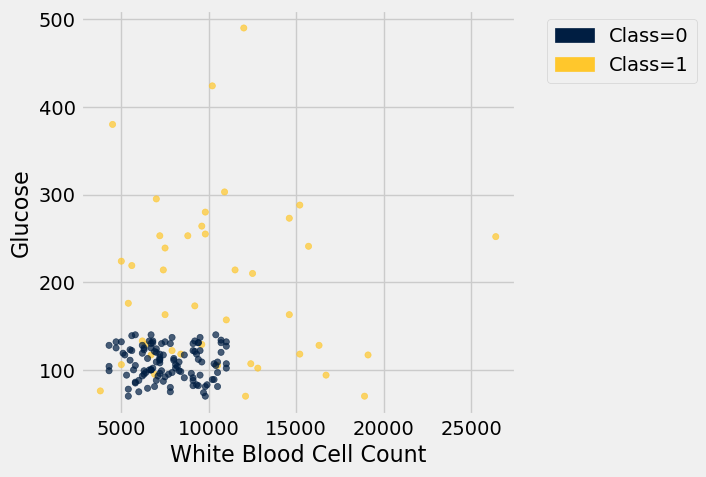

In [ ]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Class')

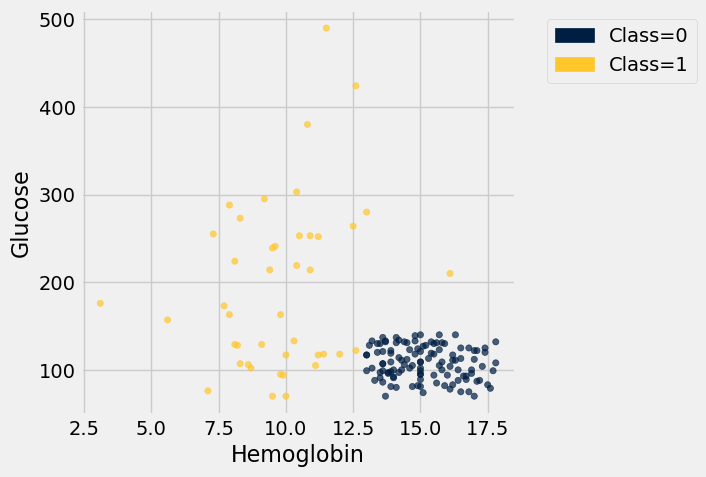

In [ ]:
ckd.scatter('Hemoglobin', 'Glucose', group='Class')

In [ ]:
class_0 = ckd.where('Class',are.equal_to(0))
max_glucose_for_0 = np.max(class_0.column('Glucose'))
min_hemoglobin_for_0 = np.min(class_0.column('Hemoglobin'))
print(f'The max glucose value for those without CKD is {max_glucose_for_0} mg/dL.')
print(f'The min hemoglobin value for those without CKD is {min_hemoglobin_for_0} g/dL.')

The max glucose value for those without CKD is 140 mg/dL.
The min hemoglobin value for those without CKD is 13.0 g/dL.


In [ ]:
def classify(hemoglobin, glucose):
    if hemoglobin < min_hemoglobin_for_0 or glucose > max_glucose_for_0:
        return 1
    else:
        return 0

In [ ]:
classify(15, 100)

0

In [ ]:
classify(10, 300)

1

---

### Classifying Banknotes

<a href="https://www.koenig-bauer.com/en/news/details/article/fast-and-reliable-authentication-of-banknotes/"><img src="./valicash.jpg" width=50% alt="ValiCash banknote app"></a>

We can use classification techniques and images of banknotes to detect forged currency.

---

#### Data and Optional Terminology

The [`banknote.csv` dataset](https://archive.ics.uci.edu/dataset/267/banknote+authentication) contains wavelet transformation (image processing) information on banknotes (bills) that have been used to classify banknotes.

- Wavelet Variance (`WaveletVar`): Measures how much the wavelet-transformed signal values vary, with bigger numbers meaning more variability.
- Wavelet Skewness (`WaveletSkew`): Measures whether the wavelet-transformed signal values lean more to the left or right.
- Wavelet Kurtosis (`WaveletCurt`): Measures whether the wavelet-transformed signal has more extreme values (heavy tails) or is more tightly clustered.
- Entropy (`Entropy`): Measures how random or unpredictable the signal is after wavelet transformation.

**Note**: You are not responsible for understanding what these terms mean for this class.


---

#### Demo: Classifying Banknotes

* Create a table called `banknotes` from `banknote.csv`.
* Notice that the dataset has two classes of banknotes (genuine and forged).
* Explore the relationship between `WaveletVar` and `WaveletCurt` to see if they are helpful features for classifying the banknotes.
* Explore the relationship between `WaveletSkew` and `Entropy` to see if they are helpful features for classifying the banknotes.
* Sometimes you need to adjust the number of features you relate to identify clear separation in the data! Let's see how all three wavelet features can be used to identify the class visually (in 4D).

In [ ]:
banknotes = Table.read_table('banknote.csv')
banknotes

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


In [ ]:
banknotes.group('Class')

Class,count
0,762
1,610


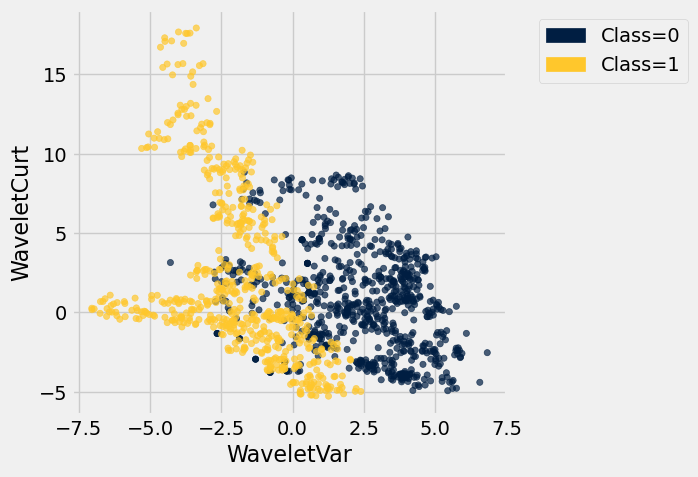

In [ ]:
banknotes.scatter('WaveletVar','WaveletCurt',group='Class')

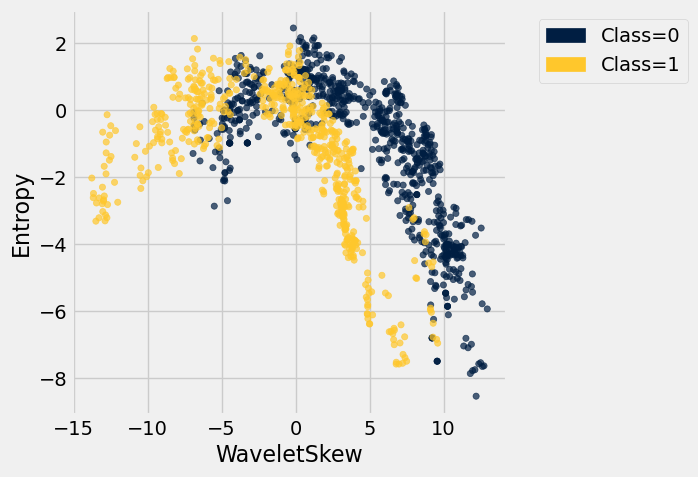

In [ ]:
banknotes.scatter('WaveletSkew', 'Entropy', group='Class')

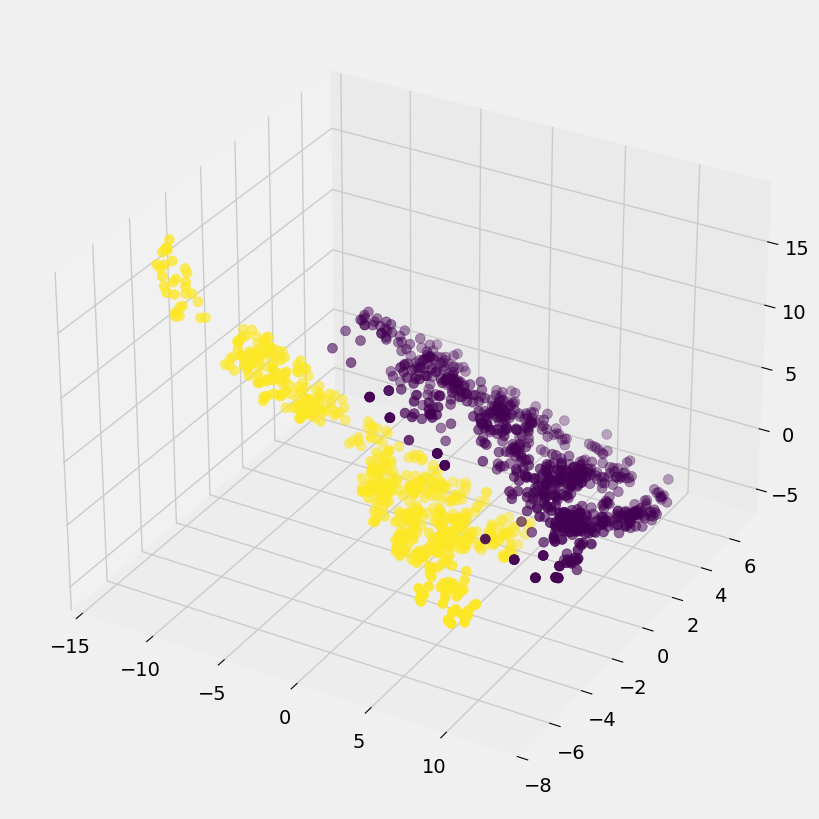

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(banknotes.column('WaveletSkew'),
           banknotes.column('WaveletVar'),
           banknotes.column('WaveletCurt'),
           c=banknotes.column('Class'),
           cmap='viridis',
          s=50);

---

### Classifying using Boundaries

* In the CKD example, the visualization with glucose and hemoglobin helped us **"see"** the boundaries for CKD.
    * Using those boundaries, we created a classifier.
* In the banknote example, the visualization with Wavelet Variance, Wavelet Skew, and Wavelet Kurtosis helped us **"see"** the boundaries for a counterfeit banknote.
    * Using those boundaries, we could create another classifier.
* This method of classification, creating a threshold, has several pros and cons.
    * Pro: Fast! 💨
    * Con: Struggles with complex or overlapping data 😔
* Is there another way to classify?
    * Yes!
    * There are several, but you'll learn about one specific method **in the next lecture**.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>